In [1]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

import random

random.seed(10)


In [2]:
from Configurations import ReservoirConfiguration
from Configurations import IPReservoirConfiguration
from IPMask import IPMask
from DATA import MG17
from Metrics import * 

In [3]:
from Configuartions import *

In [4]:
N = 20

In [5]:
initial_config = ReservoirConfiguration(N=N, bias=False, input_scaling=1, Wu_sparsity=0, Wh_sparsity=0, desired_rho=0.8, name="Vanilla 2" )

In [6]:
configs = [
    IPReservoirConfiguration(initial_config, IPMask.gaussian(N), eta=0.0000025, epochs=5, name="Gaussian"),
    
    #IPReservoirConfiguration(initial_config, IPMask.bimodal(N, mu=0.92, std=0.15), eta=0.0000025, epochs=5,  name="Bimodal"),,m
    #IPReservoirConfiguration(initial_config, IPMask.trimodal(N, mu=0.92, std_bim=0.25,), eta=0.0000025, epochs=10, name="Edged Trimodal"),
    #IPReservoirConfiguration(initial_config, IPMask.trimodal(N, linear_rate=3/5), eta=0.00000125, epochs=10, name="Linear Trimodal"),
    #IPReservoirConfiguration(initial_config, IPMask.quadrimodal(N), eta=0.0000025, epochs=5,  name="Quadrimodal"),
    ReservoirConfiguration(N=N, desired_rho=0.96, name="Vanilla"),
]

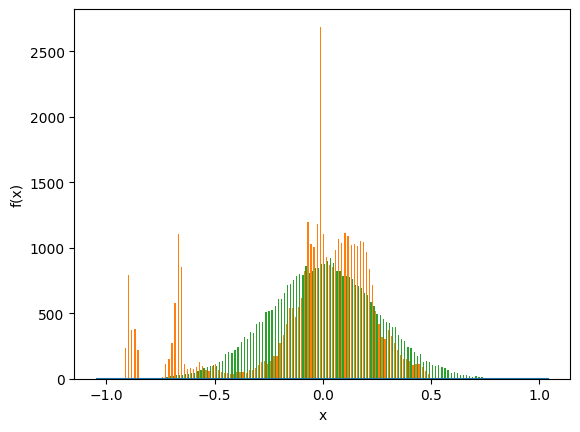

Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


In [7]:

from Evaluator import Evaluator

results = Evaluator(path=".", experiment_name="Optimal Memory Initial Config").evaluate_multiple(configs, data = MG17(percentages=[80, 0, 20]), repetitions=1 )

In [8]:
results

,Model Name,Model Index,Aggregation,MSE,NRMSE,Rho,MLLE,DeltaPhi,MC,Neff
0,Gaussian,0.0,Mean,5.881839e-07,0.158328,0.875425,-0.043073,0.093626,6.748850,2.661027
1,Gaussian,0.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Vanilla,1.0,Mean,9.744464e-07,0.203788,0.959999,-0.050937,0.068263,9.082959,3.296857
3,Vanilla,1.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
initial_configs = ReservoirHyperparamSpace(unit_range=[50], input_scaling_range=[0.25, 0.5, 1], bu_scaling_range=[1, 0.5], bh_scaling_range=[0])

In [10]:
configs = [IPReservoirConfiguration(config, eta=0.0000025, epochs=10, mask=IPMask.trimodal(50, mu=0.92, std_bim=0.25,),  name="Edged Trimodal") for config in initial_configs.get_configs()]

In [11]:
configs

In [13]:
#results = Evaluator(path=".", experiment_name="Rough gird search attempt").evaluate_multiple(configs, data = MG17(percentages=[80, 0, 20]), repetitions=1, estrinsic_metrics=[MSE()],intrinsic_metrics=[Rho()] )

In [ ]:
#results

,Model Name,Model Index,Aggregation,MSE,Rho
0,Edged Trimodal,0.0,Mean,6.816667e-07,0.590554
1,Edged Trimodal,0.0,Std,0.000000e+00,0.000000
2,Edged Trimodal,1.0,Mean,4.137295e-07,0.590554
3,Edged Trimodal,1.0,Std,0.000000e+00,0.000000
4,Edged Trimodal,2.0,Mean,6.894856e-07,0.590555
5,Edged Trimodal,2.0,Std,0.000000e+00,0.000000
6,Edged Trimodal,3.0,Mean,2.973218e-07,0.590553
7,Edged Trimodal,3.0,Std,0.000000e+00,0.000000
8,Edged Trimodal,4.0,Mean,4.669525e-07,0.590553
9,Edged Trimodal,4.0,Std,0.000000e+00,0.000000


In [ ]:
for i in [10,13,18,20,24]:
    print(i, configs[i].description())

10 Target: Trimodal - rate:0.5555555555555556 - mu: 0.92 - std_lin: 0.2 - std_bim:0.25 |  Eta: 2.5e-06 - Epochs: 10 | Initial state:  Units: 50, Input scaling: 0.25, Rho: 0.75 - Biased - Bias scaling: (0.5, 0) - Sparsity: (0, 0)
13 Target: Trimodal - rate:0.5555555555555556 - mu: 0.92 - std_lin: 0.2 - std_bim:0.25 |  Eta: 2.5e-06 - Epochs: 10 | Initial state:  Units: 50, Input scaling: 0.5, Rho: 0.75 - Biased - Bias scaling: (0.5, 0) - Sparsity: (0, 0)
18 Target: Trimodal - rate:0.5555555555555556 - mu: 0.92 - std_lin: 0.2 - std_bim:0.25 |  Eta: 2.5e-06 - Epochs: 10 | Initial state:  Units: 50, Input scaling: 0.25, Rho: 0.95 - Biased - Bias scaling: (1, 0) - Sparsity: (0, 0)
20 Target: Trimodal - rate:0.5555555555555556 - mu: 0.92 - std_lin: 0.2 - std_bim:0.25 |  Eta: 2.5e-06 - Epochs: 10 | Initial state:  Units: 50, Input scaling: 0.25, Rho: 0.95 - Unbiased - Bias scaling: (0, 0) - Sparsity: (0, 0)
24 Target: Trimodal - rate:0.5555555555555556 - mu: 0.92 - std_lin: 0.2 - std_bim:0.25 